In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('loan_data_set.csv')

In [3]:
# a) Pie chart – Plot percentage of applicant according to city/state/country.
area_counts = df['Property_Area'].value_counts()
labels = area_counts.index
counts = area_counts.values
print(labels)
print(counts)

Index(['Semiurban', 'Urban', 'Rural'], dtype='object', name='Property_Area')
[233 202 179]


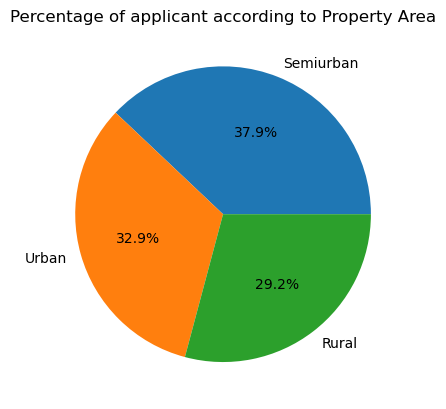

In [4]:
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of applicant according to Property Area')
plt.show()

In [5]:
# b) Bar chart – Plot the percentage of male/female applicants with respect to their Property Area for comparison.
df_b = df.groupby(['Gender','Property_Area'])['Loan_ID'].count() * 100
df_b /= df.groupby('Property_Area')['Loan_ID'].count()
df_b = df_b.reset_index()
df_b.rename(columns={'Loan_ID': 'Count'}, inplace=True)
df_b = df_b.pivot(index='Property_Area',columns='Gender',values='Count')
df_b

Gender,Female,Male
Property_Area,,
Rural,13.407821,84.357542
Semiurban,23.605150,73.819742
Urban,16.336634,82.178218


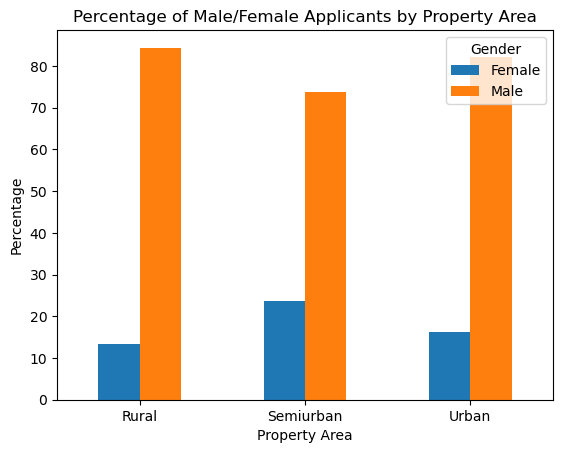

In [6]:
df_b.plot.bar()
plt.title('Percentage of Male/Female Applicants by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

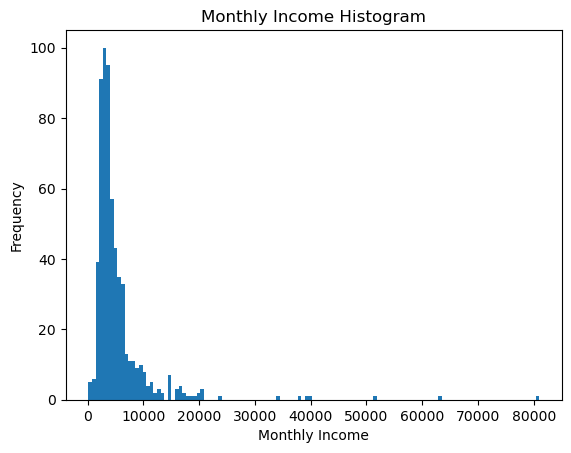

In [7]:
# c) Histograms – Plot the applicant with respect to their monthly/annually income.
plt.hist(df['ApplicantIncome'],bins=125)
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.title('Monthly Income Histogram')
plt.show()

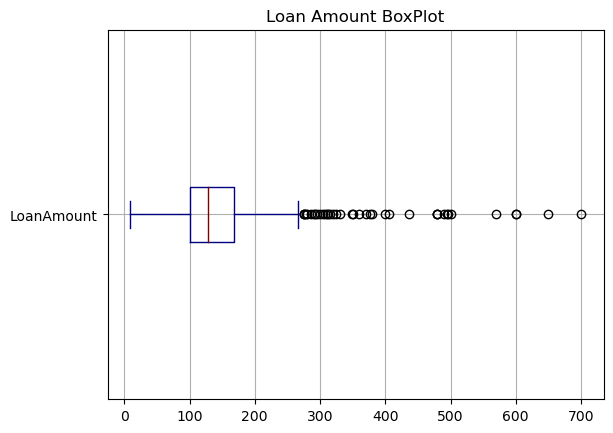

In [8]:
# d) Boxplot – Plot this with respect to the loan amount.
df['LoanAmount'].plot.box(cmap='jet',vert=False)
plt.title("Loan Amount BoxPlot")
plt.grid()
plt.show()

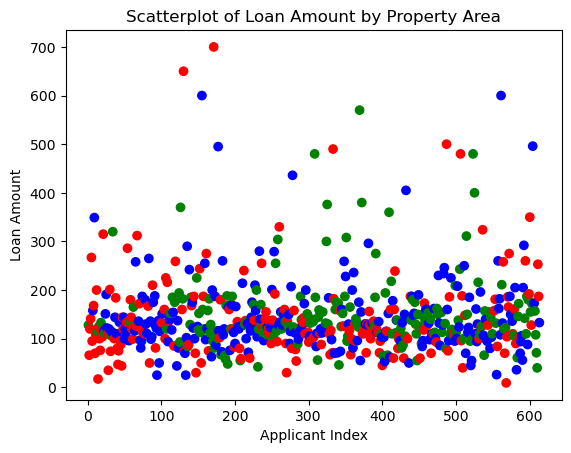

In [9]:
# e) Scatterplot – Plot this with respect to Property Area and loan amount of applicant and group them accordingly.
df_e = df.copy()
color_mapping = {'Urban': 'Red', 'Semiurban': 'Blue', 'Rural': 'Green'}
df_e['Property_Area'] = df_e['Property_Area'].replace(color_mapping)
catter = plt.scatter(df_e.index,df_e['LoanAmount'], c=df_e['Property_Area'])
plt.title('Scatterplot of Loan Amount by Property Area')
plt.xlabel('Applicant Index')
plt.ylabel('Loan Amount')
plt.show()

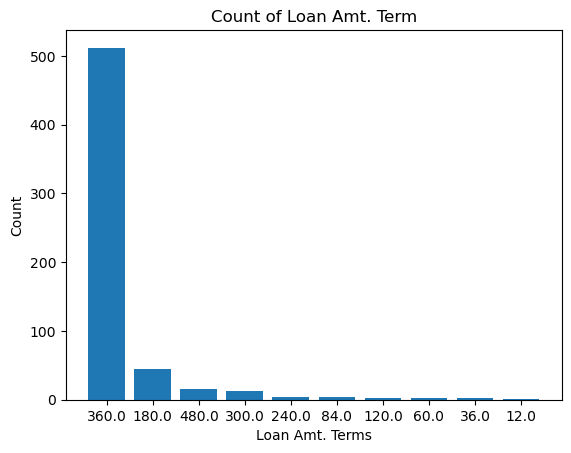

In [10]:
# f) Countplot - Plot this with respect to the number of loan applicants according to their loan amount term.
loan_amt_term = df['Loan_Amount_Term'].value_counts()
terms = loan_amt_term.index.astype(str)
plt.bar(terms,loan_amt_term.values)
plt.title('Count of Loan Amt. Term')
plt.xlabel('Loan Amt. Terms')
plt.ylabel('Count')
plt.show()

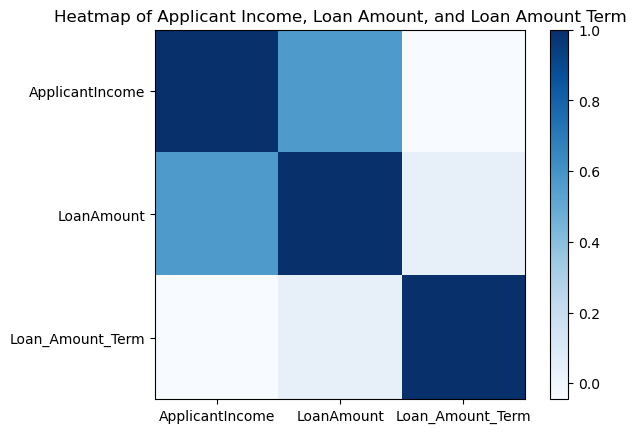

In [11]:
# g) Heatmap – Plot this with respect to the applicant income, loan amount and loan amount term.
df_g = df[['ApplicantIncome','LoanAmount','Loan_Amount_Term']]
heatmap = plt.imshow(df_g.corr(), cmap='Blues')
plt.colorbar(heatmap)
plt.xticks(range(df_g.shape[1]), df_g.columns)
plt.yticks(range(df_g.shape[1]), df_g.columns)
plt.title('Heatmap of Applicant Income, Loan Amount, and Loan Amount Term')
plt.show()